# **LAB 3 - PART 2 Regression**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import metrics
import pandas_datareader.data as web
import yfinance as yf
from sklearn import model_selection

ModuleNotFoundError: No module named 'pandas_datareader'

### **Retrieve the Financial Data**
Historical stock prices for a set of stocks, foreign exchange rates, and key market indices.

Ticker:
- stock tickers : `stk_tickers = ['MSFT', 'IBM', 'GOOGL']`
- foreign exchange tickers : `ccy_tickers = ['DEXJPUS', 'DEXUSUK']`
- market index tickers : `idx_tickers = ['SP500', 'DJIA', 'VIXCLS']`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `yf.download()`
- `web.DataReader()`
</details>

In [ ]:
### START CODE HERE ###
stk_tickers = None
ccy_tickers = None
idx_tickers = None

stk_data = yf.download(stk_tickers,start='2018-12-31', end='2023-12-31')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')
### END CODE HERE ###

### **Exploring the Data**

In [ ]:
stk_data

In [ ]:
ccy_data

In [ ]:
idx_data

Let's 
- `base` be stk_data's `'Adj Close'` and `'MSFT'`<br>
- `X1` be `stk_data`'s `'Adj Close'` and `('GOOGL','IBM')`<br>
- `X2` be `ccy_data`<br>
- `X3` be `idx_data`


In [ ]:
### START CODE HERE ###
base = None
X1 = None
X2 = None
X3 = None
### END CODE HERE ###

**Standardize `X1-3`**

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.


In [ ]:
### START CODE HERE ###
standard_scaler = None
X1 = None
X2 = None
X3 = None
### END CODE HERE ###

Create lagged and differenced features for time series analysis<br>
- `Y` : difference price of `'Adj Close', 'MSFT'` for past `n` days.
- `X4_[k]DT` : difference price of `'Adj Close', 'MSFT'` for next `[k]*n` days. Please select 3 values for `k`.
Concatenate the resulting features `X4_[k[0]]DT`, `X4_[k[1]]DT`, `X4_[k[2]]DT` into a single feature set `X4`. Finally, standardize the values in `X4`.<br>
(See detail explanation in lab direction)


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `.diff()`
- `.shift()`
</details>

In [ ]:
### START CODE HERE ###



### END CODE HERE ###

Concatenate `X1-4` to `X` by index. Then concatenate `X` and `Y` to `dataset` by index.

***NOTE:*** Please ensure that each of ***X1-3's index columns*** is the ***date column***.

In [ ]:
### START CODE HERE ###
X = None
dataset = None
### END CODE HERE ###

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

| Date       | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|------------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| 2018-12-31 | -1.545378          | -1.993072         | -0.652377 | -0.107177 | -1.966763| -1.936393| 0.492393 | 0.455826 | 3.333092 | 9.376259  | 96.792442         |
| 2019-01-01 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2019-01-02 | -1.529007          | -1.918422         | -0.684528 | -0.3554   | -1.961748| -1.931557| 0.224562 | 3.693924 | 1.728264 | 10.394836 | 96.915886         |
| 2019-01-03 | -1.578206          | -2.029912         | -0.761557 | -0.302747 | -2.05974 | -2.10151 | 0.496045 | 7.577789 | 8.52739  | 14.661652 | 97.618576         |
| 2019-01-04 | -1.48961           | -1.816142         | -0.746821 | -0.141777 | -1.927197| -1.909175| 0.000558 | 3.978821 | 2.373985 | 10.178764 | 99.014511         |
| ...        | ...                | ...               | ...       | ...       | ...      | ...      | ...      | ...      | ...      | ...       | ...               |
| 2023-12-22 | 1.46086            | 2.989076          | 1.551328  | -0.171865 | 1.577892 | 1.683629 | -1.015981| NaN      | NaN      | NaN       | 375.279999        |
| 2023-12-25 | NaN                | NaN               | NaN       | NaN       | NaN      | NaN      | NaN      | NaN      | NaN      | NaN       | NaN               |
| 2023-12-26 | 1.46187            | 3.058317          | NaN       | NaN       | 1.60962  | 1.724664 | -1.020851| NaN      | NaN      | NaN       | NaN               |
| 2023-12-27 | 1.42313            | 3.074495          | NaN       | NaN       | 1.620391 | 1.753295 | -1.089026| NaN      | NaN      | NaN       | NaN               |
| 2023-12-28 | 1.418414           | 3.09326           | NaN       | NaN       | 1.623182 | 1.767092 | NaN      | NaN      | NaN      | NaN       | NaN               |

</details>

In [ ]:
dataset

**Drop NA**

Drop NA from `dataset`.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
DatetimeIndex: 1207 entries, 2018-12-31 to 2023-11-06
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  1207 non-null   float64
 1   (Adj Close, IBM)    1207 non-null   float64
 2   DEXJPUS             1207 non-null   float64
 3   DEXUSUK             1207 non-null   float64
 4   SP500               1207 non-null   float64
 5   DJIA                1207 non-null   float64
 6   VIXCLS              1207 non-null   float64
 7   MSFT_3DT            1207 non-null   float64
 8   MSFT_6DT            1207 non-null   float64
 9   MSFT_12DT           1207 non-null   float64
 10  (Adj Close, MSFT)   1207 non-null   float64
dtypes: float64(11)
memory usage: 113.2 KB
```
<br>

| Statistic | (Adj Close, GOOGL) | (Adj Close, IBM) | DEXJPUS   | DEXUSUK   | SP500    | DJIA     | VIXCLS   | MSFT_3DT | MSFT_6DT | MSFT_12DT | (Adj Close, MSFT) |
|-----------|--------------------|-------------------|-----------|-----------|----------|----------|----------|----------|----------|-----------|-------------------|
| count     | 1207.000000        | 1207.000000       | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 | 1207.000000 |
| mean      | -0.035934          | -0.076293         | -0.048627 | 0.010266  | -0.038274| -0.038135| 0.032071 | 2.003695 | 4.026331 | 8.035808  | 228.156289        |
| std       | 0.990693           | 0.898243          | 0.967200  | 1.011495 | 0.987860 | 0.988187 | 1.006162 | 11.217826 | 15.534667 | 20.737484 | 70.323041         |
| min       | -1.578206          | -2.638620         | -1.133307 | -3.206211 | -2.391674 | -3.155777 | -1.197376 | -33.900146 | -52.498260 | -60.695969 | 96.792442         |
| 25%       | -0.995937          | -0.771499         | -0.759213 | -0.719462 | -1.006790 | -0.968910 | -0.631888 | -3.104721 | -4.466766 | -1.814156 | 165.381950        |
| 50%       | 0.007967           | -0.093102         | -0.598791 | 0.029723  | 0.217450  | 0.238699  | -0.194228 | 2.514923 | 4.754410 | 9.164612  | 238.217758        |
| 75%       | 0.814595           | 0.512558          | 0.890217  | 0.725501  | 0.808928  | 0.821986  | 0.480219  | 8.710037 | 13.093704 | 20.562767 | 284.131805        |
| max       | 1.742090           | 2.083764          | 2.144788  | 2.036573  | 1.644014  | 1.532654  | 7.464517  | 35.238464 | 48.708038 | 72.977844 | 362.464325        |



</details>

In [ ]:
### START CODE HERE ###

### END CODE HERE ###
dataset.info()
dataset.describe()

Let's `Y` be `dataset`'s `Y` column and X be all `dataset`'s columns except `Y`.

In [ ]:
### START CODE HERE ###
Y = None
X = None

### END CODE HERE ###

**Calculate the Correlation**

Drop columns that have correlation more than 0.9.

In [ ]:
### START CODE HERE ###


### END CODE HERE ###

In [ ]:
X

### **Train/Test Model**

**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 70% of data for training and last 30% for testing.


In [ ]:
### START CODE HERE ###
test_size = None
train_size = None
X_train, X_test = None
Y_train, Y_test = None
### START CODE HERE ###

### **Grid Search**
**Initialize models and Search Space**
- `Linear Regression`
- `Support Vector Regression`


Utilize the search space as provided by the Lab direction.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- Your parameters are assigned according to Lab direction.
- `Linear Regression: {'fit_intercept': [True, False]}`
- `SVR: {'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>

In [ ]:
### START CODE HERE ###











### END CODE HERE ###

Perform the grid search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the grid search space for each model.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `GridSearchCV()`
</details>


In [ ]:
### START CODE HERE ###







### END CODE HERE ###

Utilize the best parameters obtained from grid search to create both a Linear Regression model and an SVR model. Compare the predicted values of each model with those in the Y_test DataFrame and plot the graph. Also concatenate the compared dataframe with the Y_train.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
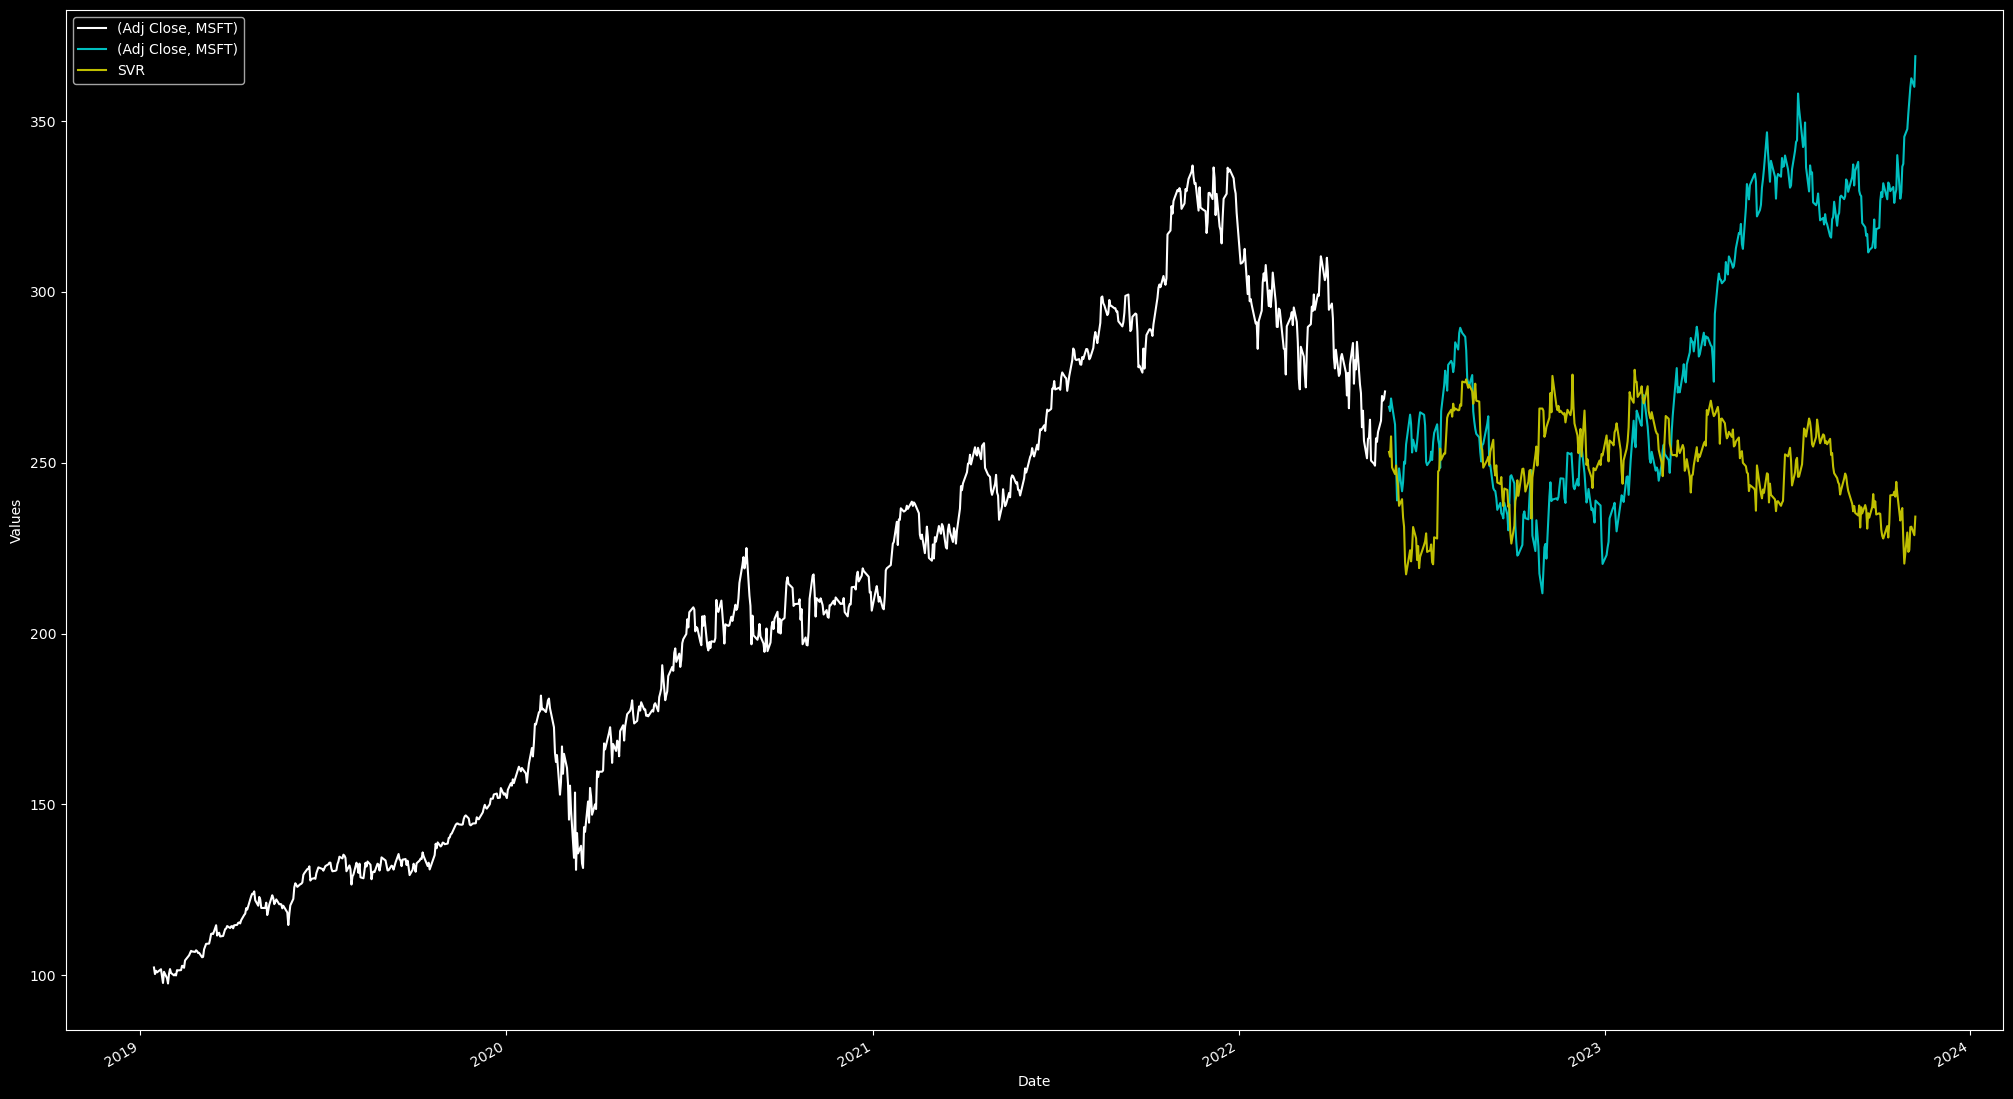

</details>

In [ ]:
### START CODE HERE ###




### END CODE HERE ###

### **Random Search**
**Initialize models and Search Space**
- `Linear Regression`
- `Support Vector Regression`


Utilize the search space as provided by the Lab direction.

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `LinearRegression()`
- `SVR()`
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
- `{'kernel': ['linear', 'rbf', 'poly'], 'C': [10, 100], 'epsilon': [0.1, 1, 5], 'gamma': [0.01, 0.1], 'degree': [2, 3]}`

</details>

In [ ]:
### START CODE HERE ###













### END CODE HERE ###

Perform the random search and print out the best parameter set along with the corresponding best score for all models. Subsequently, print the mean and standard deviation of the scores for all parameter sets within the random search space for each model.

In [ ]:
### START CODE HERE ###









### END CODE HERE ###

Utilize the best parameters obtained from random grid search to create both a Linear Regression model and an SVR model. Compare the predicted values of each model with those in the Y_test DataFrame and plot the graph. Also concatenate the comared dataframe with the Y_train.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.
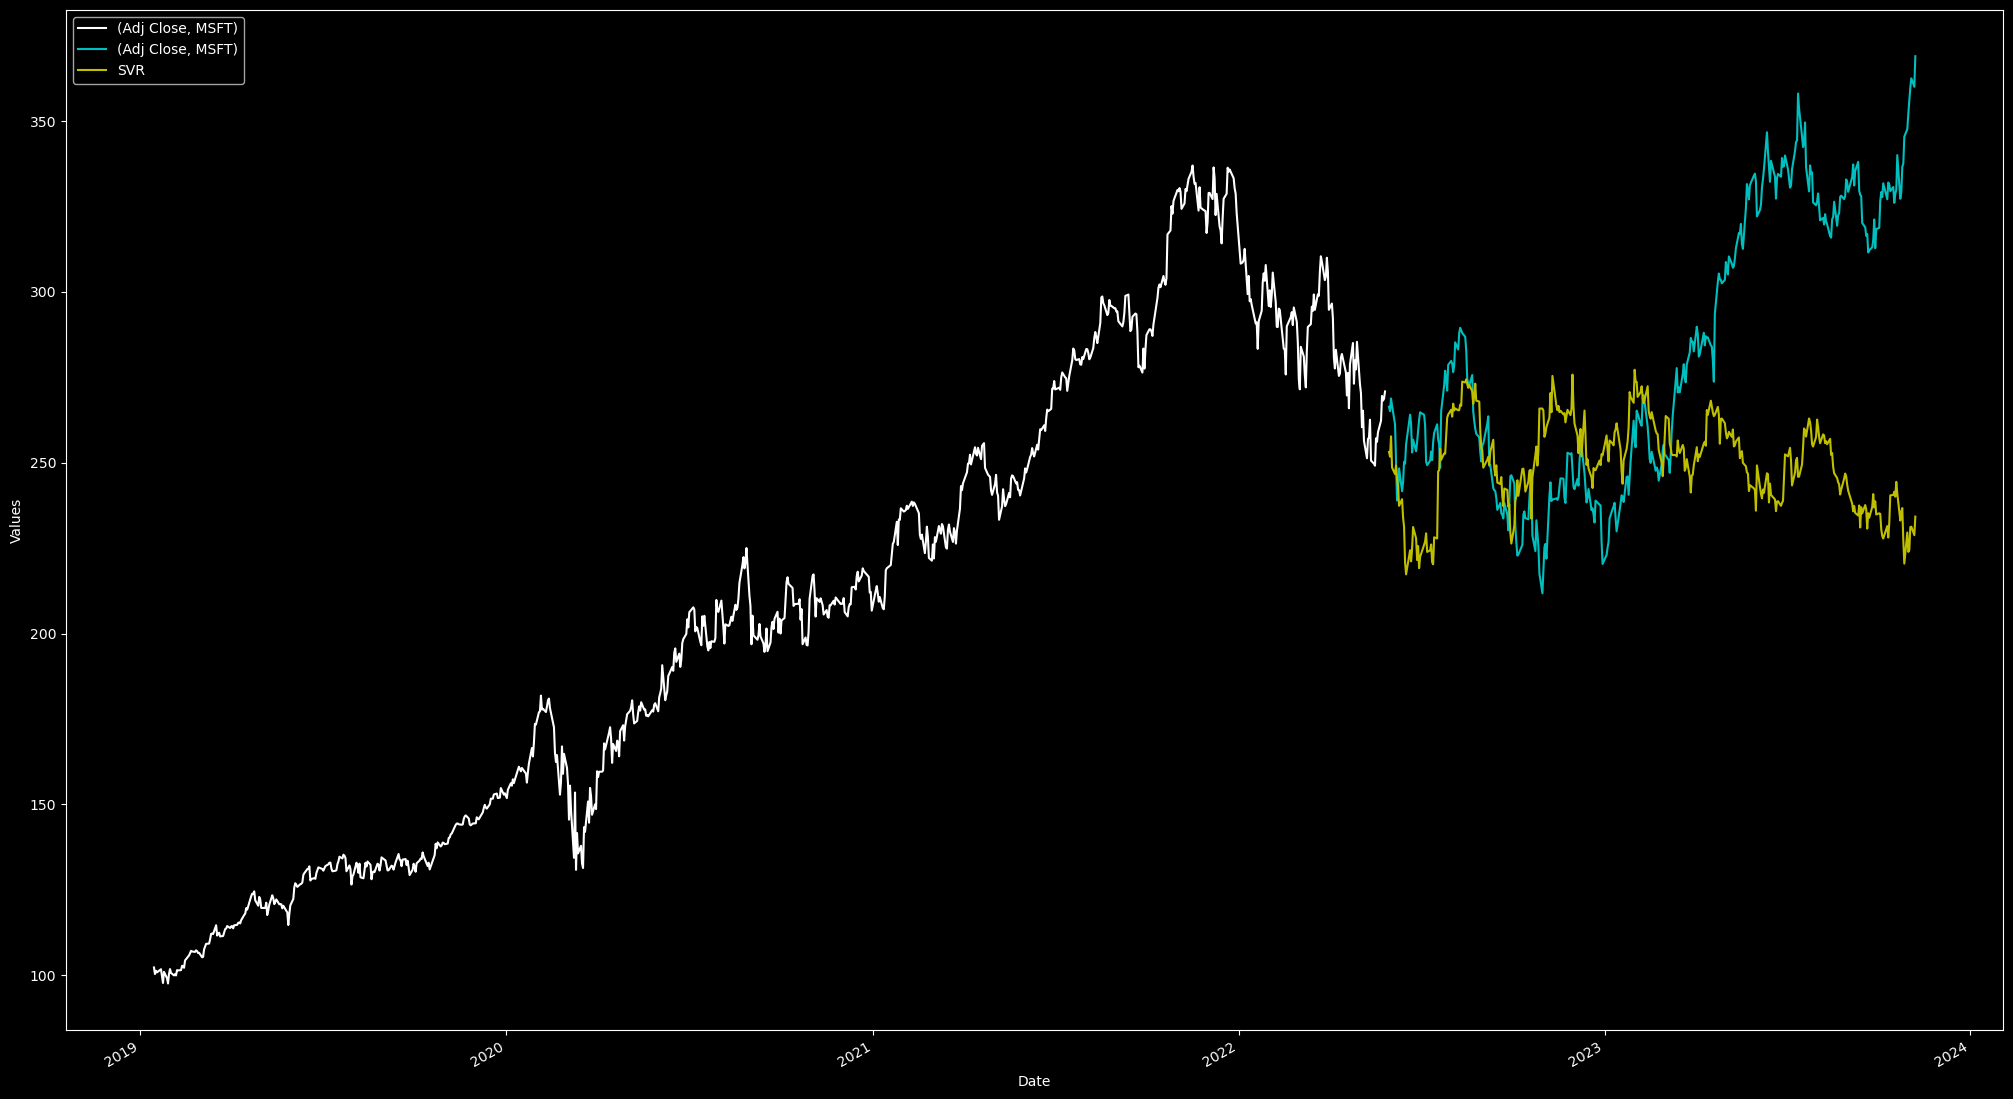

</details>

In [ ]:
### START CODE HERE ###








### START CODE HERE ###

### Question
1. Rank Top 3 Best parameters of SVM Models from GridSearchCV.
2. Rank Top 3 Best parameters of SVM Models from RandomizedSearchCV.
3. Are those best parameters from GridSearchCV similar to RandomizedSearchCV? Explain?
4. What is the Mean Squared Error (MSE) for the best parameters obtained through both GridSearchCV and RandomizedSearchCV??